# WEEK 9 (04 December)

### Objectives
* Find dataset with population density $\checkmark$
* Think about how to apply a *renormalisation* of the OD matrix (one way is finding the pairs of nearest neighbours and rearranging the ODM so that neighbours are consecutive elements in the matrix; this results in a matrix with 0 elements only along the diagonal and lots of quadrants that need to be reduced to one element.

### Notes
Found dataset with population density in 20 countries with a resolution of 5 meters, but too big (~3GB), so will start from a smaller one with UK wards data only: https://data.cdrc.ac.uk/dataset/cdrc-2011-population-weighted-centroids-gb

### To Do
* Figure out how to use dataset: need to open TIFF file as Numpy array $\checkmark$
* Figure out how to find distance
* Perform clustering
* Apply model to find flow

### Meeting
* hierarachical agglomerative clustering: 


In [37]:
import numpy as np
import pandas 
from hm.analysis import random_tripoint as rt
from hm.analysis import plots
from hm.pop_models.pop_explicit import explicit as pop_explicit
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as hier
import importlib
importlib.reload(plots)

<module 'hm.analysis.plots' from '/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/plots.py'>

In [14]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
df

,CODE,Name,TotPop2011,HouPop2011,HHCnt2011,Easting,Northing
0,S01006506,Culter - 01,872,852,424,383772,800512
1,S01006507,Culter - 02,836,836,364,383624,801298
2,S01006508,Culter - 03,643,643,340,383495,800782
3,S01006509,Culter - 04,580,580,274,383855,801018
4,S01006510,Culter - 05,644,577,256,384068,801031
5,S01006511,Culter - 06,751,749,315,384453,800914
6,S01006512,Culter - 07,519,496,170,382439,801986
7,S01006513,"Cults, Bieldside and Milltimber West - 01",648,568,230,386152,801879
8,S01006514,"Cults, Bieldside and Milltimber West - 02",1043,940,339,385604,801505
9,S01006515,"Cults, Bieldside and Milltimber West - 03",762,762,271,385866,802226


In [58]:
x = np.array(df)[:,5][40000:41500]
y = np.array(df)[:,6][40000:40500]
m = np.array(df)[:,2][40000:40500]
xy = np.array([x, y])
mxy = np.array([x, y, m])
xy = np.transpose(xy)
mxy = np.transpose(mxy)
p = pop_explicit(xy, m)
hier.fclusterdata(mxy, 5, metric = 'euclidean', method = 'single')

ValueError: setting an array element with a sequence.

In [30]:
alpha, beta, gamma = 1, 1, 0.2
g = gravity(p, alpha, beta, gamma, exp=True)

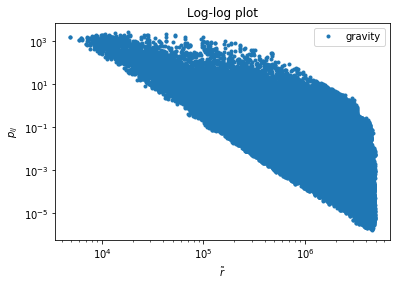

In [31]:
plots.plot_flow(p, g, gamma = 3)